# База данных:

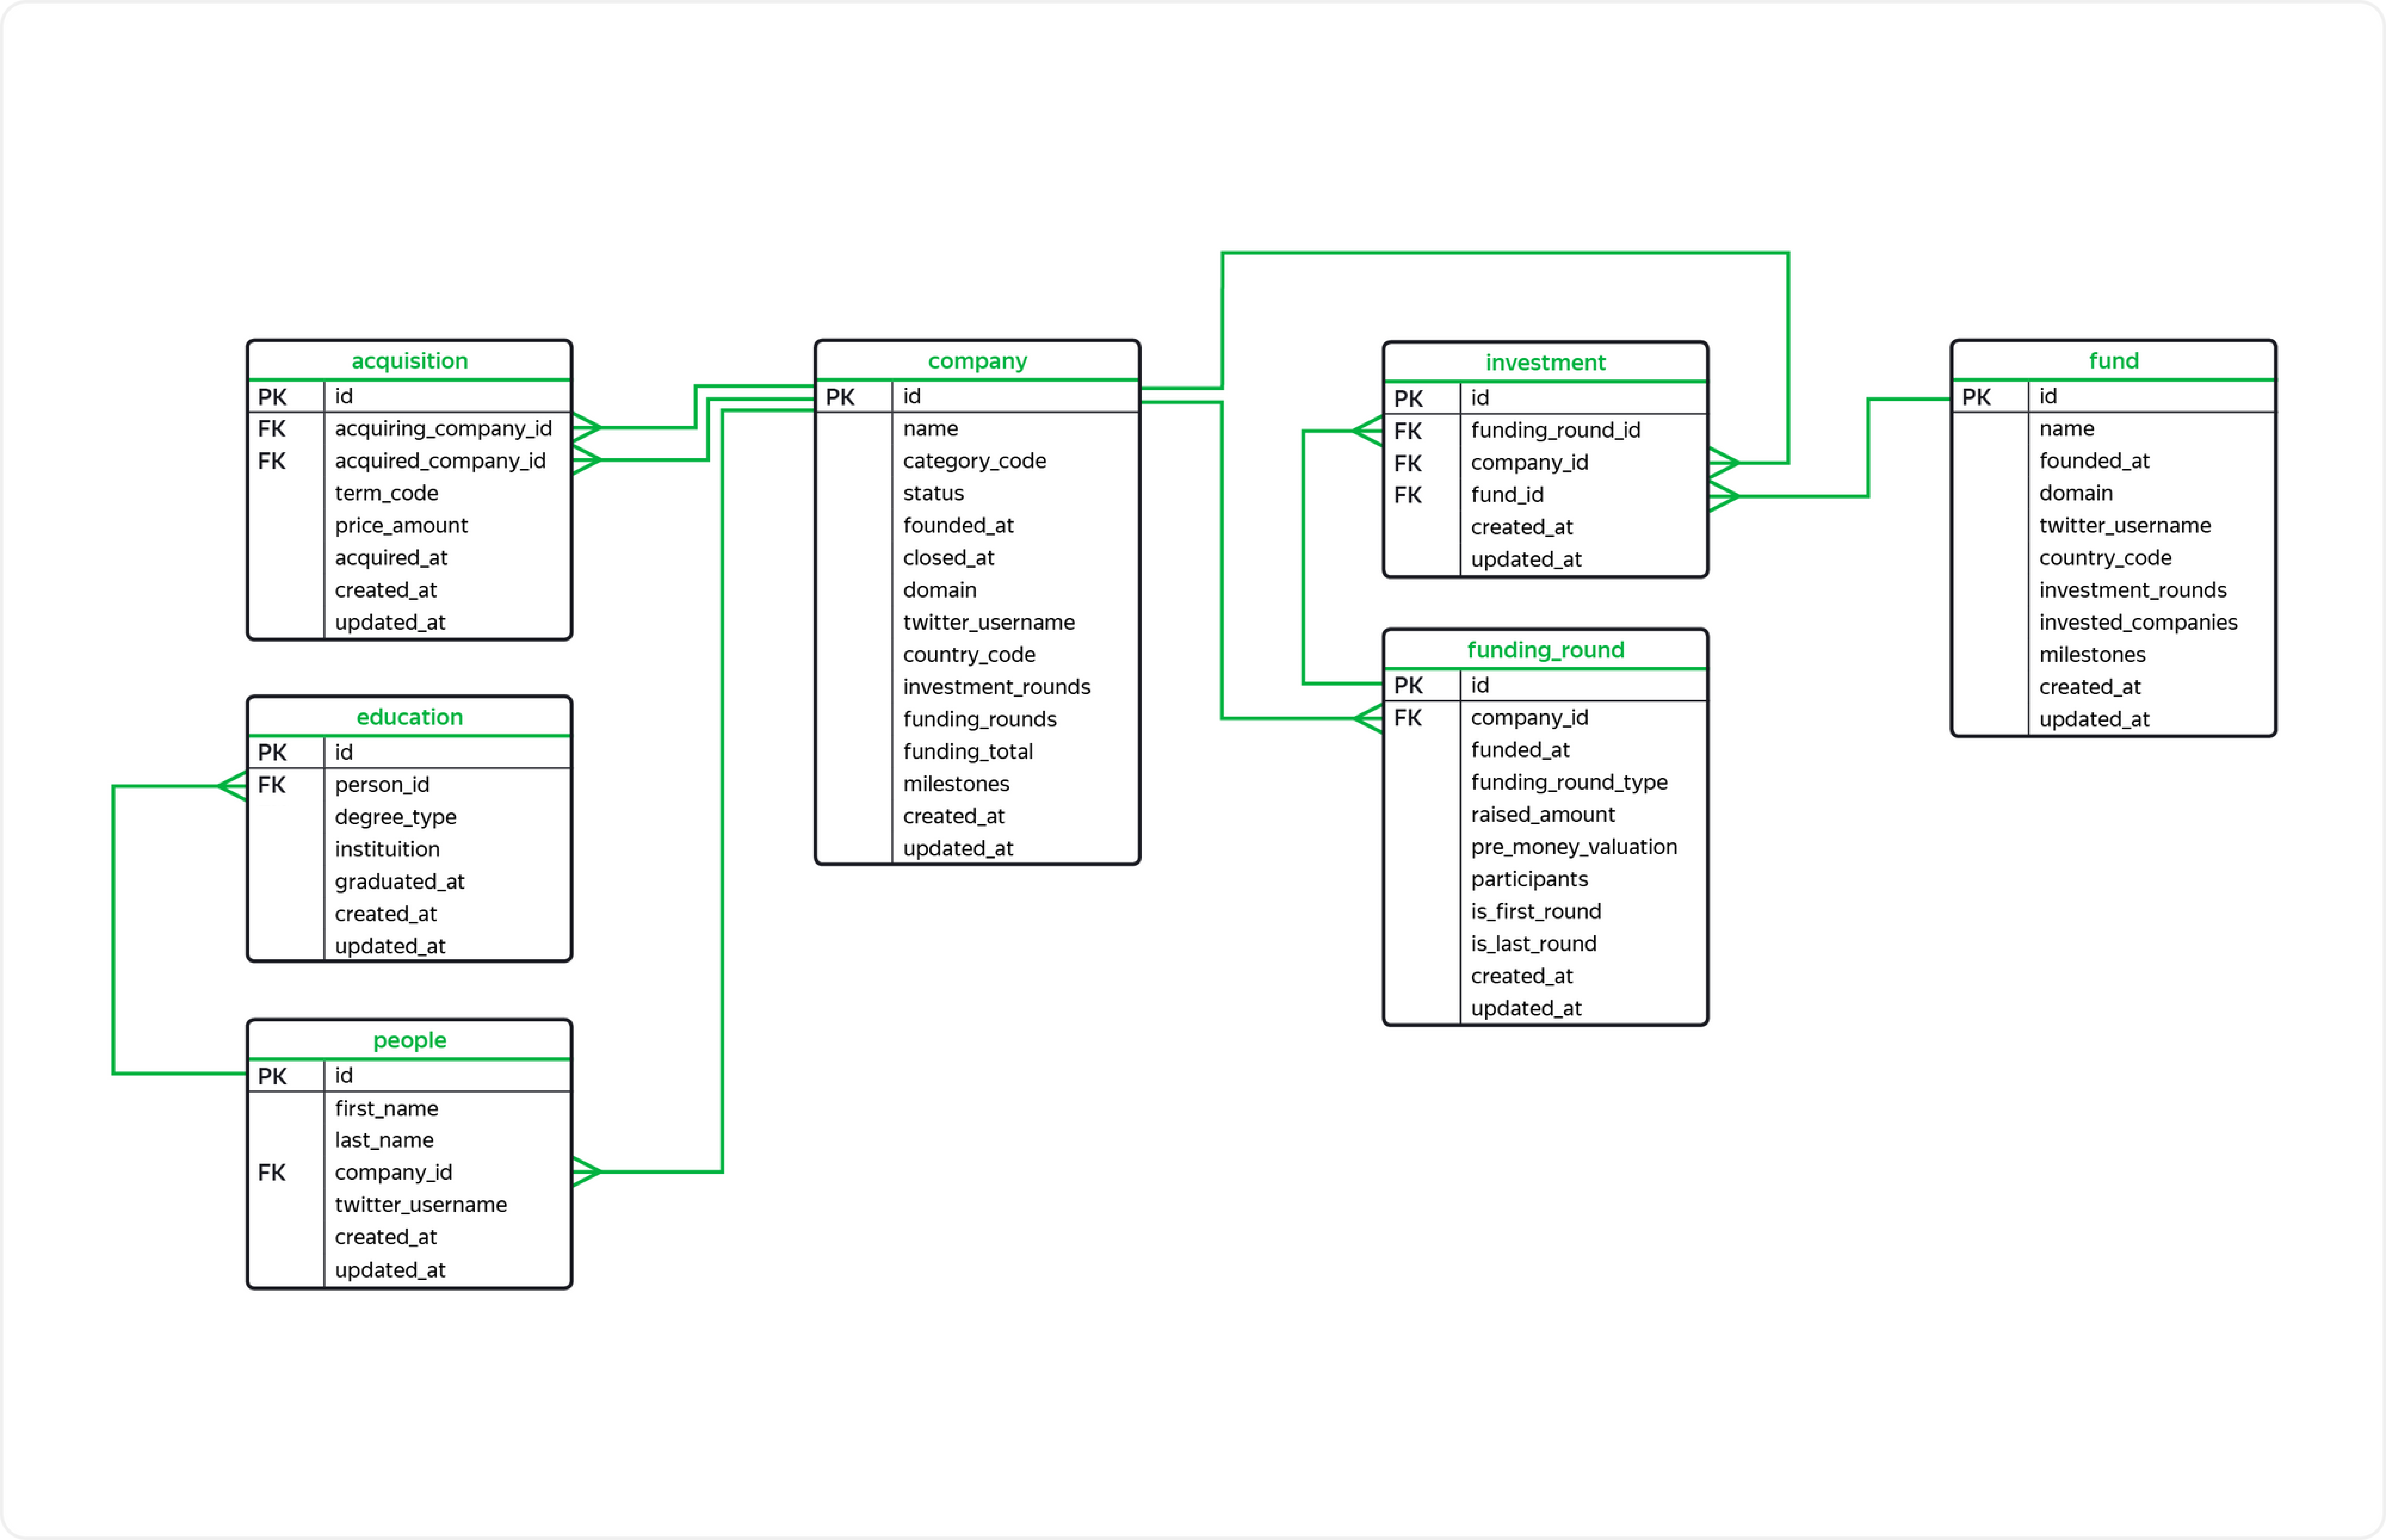

**Данные, которые хранят таблицы:**
    
acquisition
Содержит информацию о покупках одних компаний другими.
Таблица включает такие поля:

    первичный ключ id — идентификатор или уникальный номер покупки;
    внешний ключ acquiring_company_id — ссылается на таблицу company — идентификатор компании-покупателя, то есть той, что покупает другую компанию;
    внешний ключ acquired_company_id — ссылается на таблицу company — идентификатор компании, которую покупают;
    term_code — способ оплаты сделки:
      
        cash — наличными;
        stock — акциями компании;
        cash_and_stock — смешанный тип оплаты: наличные и акции.
    price_amount — сумма покупки в долларах;
    acquired_at — дата совершения сделки;
    created_at — дата и время создания записи в таблице;
    updated_at — дата и время обновления записи в таблице.

company
Содержит информацию о компаниях-стартапах.

    первичный ключ id — идентификатор, или уникальный номер компании;
    name — название компании;
    category_code — категория деятельности компании, например:
      
        news — специализируется на работе с новостями;
        social — специализируется на социальной работе.
    status — статус компании:
      
        acquired — приобретена;
        operating — действует;
        ipo — вышла на IPO;
        closed — перестала существовать.
    founded_at — дата основания компании;
    closed_at — дата закрытия компании, которую указывают в том случае, если компании больше не существует;
    domain — домен сайта компании;
    twitter_username — название профиля компании в твиттере;
    country_code — код страны, например, USA для США, GBR для Великобритании;
    investment_rounds — число раундов, в которых компания участвовала как инвестор;
    funding_rounds — число раундов, в которых компания привлекала инвестиции;
    funding_total — сумма привлечённых инвестиций в долларах;
    milestones — количество важных этапов в истории компании;
    created_at — дата и время создания записи в таблице;
    updated_at — дата и время обновления записи в таблице.

education
Хранит информацию об уровне образования сотрудников компаний.

    первичный ключ id — уникальный номер записи с информацией об образовании;
    внешний ключ person_id — ссылается на таблицу people — идентификатор человека, информация о котором представлена в записи;
    degree_type — учебная степень, например:
      
        BA — Bachelor of Arts — бакалавр гуманитарных наук;
        MS — Master of Science — магистр естественных наук.
    instituition — учебное заведение, название университета;
    graduated_at — дата завершения обучения, выпуска;
    created_at — дата и время создания записи в таблице;
    updated_at — дата и время обновления записи в таблице.

fund
Хранит информацию о венчурных фондах. 

    первичный ключ id — уникальный номер венчурного фонда;
    name — название венчурного фонда;
    founded_at — дата основания фонда;
    domain — домен сайта фонда;
    twitter_username — профиль фонда в твиттере;
    country_code — код страны фонда;
    investment_rounds — число инвестиционных раундов, в которых фонд принимал участие;
    invested_companies — число компаний, в которые инвестировал фонд;
    milestones — количество важных этапов в истории фонда;
    created_at — дата и время создания записи в таблице;
    updated_at — дата и время обновления записи в таблице.

funding_round
Содержит информацию о раундах инвестиций. 

    первичный ключ id — уникальный номер инвестиционного раунда;
    внешний ключ company_id — ссылается на таблицу company — уникальный номер компании, участвовавшей в инвестиционном раунде;
    funded_at — дата проведения раунда;
    funding_round_type — тип инвестиционного раунда, например:
      
        venture — венчурный раунд;
        angel — ангельский раунд;
        series_a — раунд А.
    raised_amount — сумма инвестиций, которую привлекла компания в этом раунде в долларах;
    pre_money_valuation — предварительная, проведённая до инвестиций оценка стоимости компании в долларах;
    participants — количество участников инвестиционного раунда;
    is_first_round — является ли этот раунд первым для компании;
    is_last_round — является ли этот раунд последним для компании;
    created_at — дата и время создания записи в таблице;
    updated_at — дата и время обновления записи в таблице.

investment
Содержит информацию об инвестициях венчурных фондов в компании-стартапы.

    первичный ключ id — уникальный номер инвестиции;
    внешний ключ funding_round_id — ссылается на таблицу funding_round — уникальный номер раунда инвестиции;
    внешний ключ company_id — ссылается на таблицу company — уникальный номер компании-стартапа, в которую инвестируют;
    внешний ключ fund_id — ссылается на таблицу fund — уникальный номер фонда, инвестирующего в компанию-стартап;
    created_at — дата и время создания записи в таблице;
    updated_at — дата и время обновления записи в таблице.

people
Содержит информацию о сотрудниках компаний-стартапов.

    первичный ключ id — уникальный номер сотрудника;
    first_name — имя сотрудника;
    last_name — фамилия сотрудника;
    внешний ключ company_id — ссылается на таблицу company — уникальный номер компании-стартапа;
    twitter_username — профиль сотрудника в твиттере;
    created_at — дата и время создания записи в таблице;
    updated_at — дата и время обновления записи в таблице.

# Задания

В самостоятельном проекте нам нужно проанализировать данные о фондах и инвестициях и написать запросы к базе.

**1. Посчитайте, сколько компаний закрылось.**

In [ ]:
select COUNT(id)
from company
where status like '%closed%';

**Результат:**    
count    
2584


**2. Отобразите количество привлечённых средств для новостных компаний США. Используйте данные из таблицы company. Отсортируйте таблицу по убыванию значений в поле funding_total.**

In [ ]:
select funding_total
from company
where country_code = 'USA'
and category_code = 'news'
order by funding_total desc

**Результат:**    
funding_total    
6.22553e+08    
2.5e+08     
1.605e+08    
1.28e+08    
1.265e+08    
7e+07    
6.9e+07    
...

**3. Найдите общую сумму сделок по покупке одних компаний другими в долларах. Отберите сделки, которые осуществлялись только за наличные с 2011 по 2013 год включительно.**

In [ ]:
select sum(price_amount)
from acquisition
where term_code = 'cash'
and extract(year from acquired_at) in (2011, 2012, 2013)

**Результат:**    
sum    
1.37762e+11

**4. Отобразите имя, фамилию и названия аккаунтов людей в твиттере, у которых названия аккаунтов начинаются на 'Silver'.**

In [ ]:
select first_name,
       last_name,
       twitter_username
from people
where twitter_username like 'Silver%';

**Результат:**    
|first_name	 |   last_name	  |  twitter_username|
|------------|----------------|------------------|
|Rebecca	 |   Silver	      |  SilverRebecca   |    
|Silver	     |   Teede	      |  SilverMatrixx   |    
|Mattias	 |   Guilotte	  |  Silverreven     |

**5. Выведите на экран всю информацию о людях, у которых названия аккаунтов в твиттере содержат подстроку 'money', а фамилия начинается на 'K'.**

In [ ]:
select *
from people
where twitter_username like '%money%'
and last_name like 'K%';

**Результат:**    
|id	  |first_name|last_name	|company_id	|twitter_username|created_at|updated_at|
|-----|----------|----------|-----------|----------------|----------|----------|
|63081|	Gregory	 | Kim      |           |gmoney75        |2010-07-13|03:46:28|

**6. Для каждой страны отобразите общую сумму привлечённых инвестиций, которые получили компании, зарегистрированные в этой стране. Страну, в которой зарегистрирована компания, можно определить по коду страны. Отсортируйте данные по убыванию суммы.**

In [ ]:
select country_code,
       sum(funding_total) as total_sum
from company
group by country_code
order by total_sum desc;

**Результат:**    
|country_code | total_sum      |
|-------------|----------------|
|USA |3.10588e+11|
|GBR |1.77056e+10|
|	|1.08559e+10|
|CHN	|1.06897e+10|
|CAN	|9.86636e+09|
|IND	|6.14141e+09|
...

**7. Составьте таблицу, в которую войдёт дата проведения раунда, а также минимальное и максимальное значения суммы инвестиций, привлечённых в эту дату.
Оставьте в итоговой таблице только те записи, в которых минимальное значение суммы инвестиций не равно нулю и не равно максимальному значению.**

In [ ]:
select funded_at,
       min(raised_amount) as mi,
       max(raised_amount) as ma
from funding_round
group by funded_at
having min(raised_amount) <> 0
and min(raised_amount) <> max(raised_amount);

**Результат:**    
|funded_at|	mi|	ma|
|----------|------|-------|
|2012-08-22	|40000	|7.5e+07|
|2010-07-25	|3.27825e+06|	9e+06|
|2002-03-01	|2.84418e+06|	8.95915e+06|
|2010-10-11	|28000	|2e+08|
|2007-01-18	|5.5e+06|	2.3e+07|
|2007-02-27	|1.29e+06|	3.6e+07|
...

**8. Создайте поле с категориями:**
    
    * Для фондов, которые инвестируют в 100 и более компаний, назначьте категорию high_activity.
    * Для фондов, которые инвестируют в 20 и более компаний до 100, назначьте категорию middle_activity.
    * Если количество инвестируемых компаний фонда не достигает 20, назначьте категорию low_activity.
    
**Отобразите все поля таблицы fund и новое поле с категориями.**

In [ ]:
select *,
       case
           when invested_companies >= 100 then 'high_activity'
           when invested_companies >= 20 and invested_companies < 100 then 'middle_activity'
           when invested_companies < 20 then 'low_activity'
       end
from fund;

**Результат:**    
|id	|name	|founded_at	|domain	|twitter_username|	country_code|	investment_rounds|	invested_companies|	milestones|	created_at|	updated_at|	case|
|--------|---------|-----------|----------|-----------|-----------|--------|---------|----------|--------|---------|---------|
|13131	|	|	|	|	|	|0	|0	|0	|2013-08-19 18:46:55	|2013-08-19 19:55:07|	low_activity|
|1	|Greylock Partners|	1965-01-01|	greylock.com|	greylockvc|	USA	|307	|196	|0	|2007-05-25 20:18:23|	2012-12-27 00:42:24	|high_activity|
|10	|Mission Ventures|	1996-01-01|	missionventures.com|	|	USA|	58|	33|	0|	2007-06-05 05:24:58|	2013-10-10 22:06:31|	middle_activity|
|100|	Kapor Enterprises, Inc.|	|	kei.com|	|	USA|	2|	1|	0|	2007-07-12 09:42:21|	2008-11-21 05:41:53|	low_activity|
...

**9. Для каждой из категорий, назначенных в предыдущем задании, посчитайте округлённое до ближайшего целого числа среднее количество инвестиционных раундов, в которых фонд принимал участие. Выведите на экран категории и среднее число инвестиционных раундов. Отсортируйте таблицу по возрастанию среднего.**

In [ ]:
SELECT CASE
           WHEN invested_companies>=100 THEN 'high_activity'
           WHEN invested_companies>=20 THEN 'middle_activity'
           ELSE 'low_activity'
       END AS activity,
       ROUND(AVG(investment_rounds))
FROM fund
group by activity

**Результат:**    
|activity|	round|
|-------------|-------|
|low_activity|	2|
|middle_activity|	51|
|high_activity|	252|

**10. Проанализируйте, в каких странах находятся фонды, которые чаще всего инвестируют в стартапы. 
Для каждой страны посчитайте минимальное, максимальное и среднее число компаний, в которые инвестировали фонды этой страны, основанные с 2010 по 2012 год включительно. Исключите страны с фондами, у которых минимальное число компаний, получивших инвестиции, равно нулю. 
Выгрузите десять самых активных стран-инвесторов: отсортируйте таблицу по среднему количеству компаний от большего к меньшему. Затем добавьте сортировку по коду страны в лексикографическом порядке.**

In [ ]:
select country_code,
       min(invested_companies) as min_in,
       max(invested_companies) as max_in,
       avg(invested_companies) as avg_in
from fund
where extract(year from founded_at) between 2010 and 2012
group by country_code
having min(invested_companies) > 0
order by avg_in desc, country_code
limit 10;

**Результат:**    
|country_code|	min_in|	max_in|	avg_in|
|------------|--------|-------|-------|
|BGR	|25|	35|	30|
|CHL	|29|	29|	29|
|UKR	|8|	10|	9|
|LTU	|5|	5|	5|
|IRL	|4|	5|	4.5|
...

**11. Отобразите имя и фамилию всех сотрудников стартапов. Добавьте поле с названием учебного заведения, которое окончил сотрудник, если эта информация известна.**

In [ ]:
select p.first_name,
       p.last_name,
       e.instituition
from people as p
left outer join education as e on p.id=e.person_id;

**Результат:**    
|first_name	|last_name	|instituition|
|-----------|----------------|----------------------------------|
|John|	Green|	Washington University, St. Louis|
|John|	Green|	Boston University|
|David|	Peters|	Rice University|
|Dan|	Birdwhistell|	University of Cambridge|
...

**12. Для каждой компании найдите количество учебных заведений, которые окончили её сотрудники. Выведите название компании и число уникальных названий учебных заведений. Составьте топ-5 компаний по количеству университетов.**

In [ ]:
select c.name,
       count(distinct e.instituition) as con
from company as c
left join people as p on c.id=p.company_id
join education as e on p.id=e.person_id
group by c.name
order by con desc
limit 5;

**Результат:**    
|name	|con|
|--------------------|------|
|Google	|167|
|Yahoo!	|115|
|Microsoft|	111|
|Knight Foundation|	74|
|Comcast	|66|

**13. Составьте список с уникальными названиями закрытых компаний, для которых первый раунд финансирования оказался последним.**

In [ ]:
select name
from company
where id in (select company_id
               from funding_round
               where is_first_round=1
               and is_last_round=1)
and status='closed';

**Результат:**    
|name|
|-------------|
|Youlicit|
|Workstir|
|FairSoftware|
|SellABand|
|HammerKit|
...

**14. Составьте список уникальных номеров сотрудников, которые работают в компаниях, отобранных в предыдущем задании.**

In [ ]:
select distinct people.id
from people
where company_id in (select distinct company.id
                     from company
                     where id in (select company_id
                                  from funding_round
                                  where is_first_round=1
                                  and is_last_round=1)
                     and status='closed');

**Результат:**    
|id|
|-----|
|62|
|97|
|98|
|225|
...

**15. Составьте таблицу, куда войдут уникальные пары с номерами сотрудников из предыдущей задачи и учебным заведением, которое окончил сотрудник.**

In [ ]:
select distinct e.instituition,
       pid.id
from
    (select distinct people.id
     from people
     where company_id in (select distinct company.id
                          from company
                          where id in (select company_id
                                       from funding_round
                                       where is_first_round=1
                                       and is_last_round=1)
                          and status='closed')) as pid
join education as e on e.person_id=pid.id;

**Результат:**     
|instituition	|id|
|----------------|------------|
|????????? ??????????????? ??????????? ??????????? ??. ?.?. ?????|	44915|
|AKI	|349|
|Arg |48426|
|ArtEZ Hogeschool voor de Kunsten|349|
|Athabasca University	|90419|
...

**16. Посчитайте количество учебных заведений для каждого сотрудника из предыдущего задания. При подсчёте учитывайте, что некоторые сотрудники могли окончить одно и то же заведение дважды.**

In [ ]:
select id,
       count(instituition) as con
from
    (select e.instituition,
           pid.id
    from
        (select distinct people.id
         from people
         where company_id in (select distinct company.id
                              from company
                              where id in (select company_id
                                           from funding_round
                                           where is_first_round=1
                                           and is_last_round=1)
                              and status='closed')) as pid
    join education as e on e.person_id=pid.id) as p
group by id;

**Результат:**     
|id	|con|
|------|-------|
|349	|3|
|699	|1|
|779	|2|
|968	|1|
...

**17. Дополните предыдущий запрос и выведите среднее число учебных заведений (всех, не только уникальных), которые окончили сотрудники разных компаний. Нужно вывести только одну запись, группировка здесь не понадобится.**

In [ ]:
select avg(pon.con)
from
    (select id,
           count(instituition) as con
    from
        (select e.instituition,
               pid.id
        from
            (select distinct people.id
             from people
             where company_id in (select distinct company.id
                                  from company
                                  where id in (select company_id
                                               from funding_round
                                               where is_first_round=1
                                               and is_last_round=1)
                                  and status='closed')) as pid
        join education as e on e.person_id=pid.id) as p
    group by id) as pon;

**Результат:**    
avg    
1.41509 

**18. Напишите похожий запрос: выведите среднее число учебных заведений (всех, не только уникальных), которые окончили сотрудники Facebook*.    
*(сервис, запрещённый на территории РФ)**

In [ ]:
select avg(pon.con)
from
    (select id,
           count(instituition) as con
    from
        (select e.instituition,
               pid.id
        from
            (select people.id
             from people
             where company_id in (select company.id
                                  from company
                                  where name = 'Facebook')) as pid
        join education as e on e.person_id=pid.id) as p
    group by id) as pon;

**Результат:**    
avg    
1.51111

**19. Составьте таблицу из полей:**

    * name_of_fund — название фонда;
    * name_of_company — название компании;
    * amount — сумма инвестиций, которую привлекла компания в раунде.
    
**В таблицу войдут данные о компаниях, в истории которых было больше шести важных этапов, а раунды финансирования проходили с 2012 по 2013 год включительно.**

In [ ]:
select f.name as name_of_fund,
       c.name as name_of_company,
       fr.raised_amount as amount
from investment as i
join company as c on i.company_id=c.id
join fund as f on i.fund_id=f.id
join funding_round as fr on i.funding_round_id=fr.id
where c.milestones > 6
and extract(year from fr.funded_at) in(2012, 2013);

**Результат:**    
|name_of_fund|	name_of_company|	amount|
|-----------------|--------------|----------------|
|SAP Ventures	|OpenX	|2.50112e+07|
|Samsung Ventures	|OpenX	|2.50112e+07|
|Index Ventures	|OpenX	|2.50112e+07|
|Presidio Ventures	|OpenX	|2.50112e+07|
...

**20. Выгрузите таблицу, в которой будут такие поля:**

    * название компании-покупателя;
    * сумма сделки;
    * название компании, которую купили;
    * сумма инвестиций, вложенных в купленную компанию;
    * доля, которая отображает, во сколько раз сумма покупки превысила сумму вложенных в компанию инвестиций, округлённая до ближайшего целого числа.

**Не учитывайте те сделки, в которых сумма покупки равна нулю. Если сумма инвестиций в компанию равна нулю, исключите такую компанию из таблицы. 
Отсортируйте таблицу по сумме сделки от большей к меньшей, а затем по названию купленной компании в лексикографическом порядке. Ограничьте таблицу первыми десятью записями.**

In [ ]:
select c1.name as acquiring,
       a.price_amount as pa,
       c2.name as acquired,
       c2.funding_total as invest,
       round(a.price_amount / c2.funding_total) as quota
from acquisition as a
left join company as c1 on c1.id=a.acquiring_company_id
left join company as c2 on c2.id=a.acquired_company_id
where a.price_amount <> 0 
and c2.funding_total <> 0
order by pa desc, acquired
limit 10;

**Результат:**    
|acquiring	|pa	|acquired	|invest	|quota|
|--------------|----------|------------------|--------|--------|
|Microsoft	|8.5e+09	|Skype	|7.6805e+07|	111|
|Scout Labs	|4.9e+09	|Varian Semiconductor Equipment Associates	|4.8e+06	|1021|
|Broadcom	|3.7e+09	|Aeluros	|7.97e+06	|464|
|Broadcom	|3.7e+09	|NetLogic Microsystems	|1.88527e+08	|20|
...

**21. Выгрузите таблицу, в которую войдут названия компаний из категории social, получившие финансирование с 2010 по 2013 год включительно. Проверьте, что сумма инвестиций не равна нулю. Выведите также номер месяца, в котором проходил раунд финансирования.**

In [ ]:
select c.name,
       extract(month from fr.funded_at::date)
from company as c
left join funding_round as fr on c.id=fr.company_id
where c.category_code='social'
and extract(year from fr.funded_at::date) between 2010 and 2013
and fr.raised_amount <> 0;

**Результат:**     
|name	|date_part|
|----------|----------|
|Klout	|1|
|WorkSimple	|3|
|HengZhi	|1|
|Twitter	|1|
...

**22. Отберите данные по месяцам с 2010 по 2013 год, когда проходили инвестиционные раунды. Сгруппируйте данные по номеру месяца и получите таблицу, в которой будут поля:**

    * номер месяца, в котором проходили раунды;
    * количество уникальных названий фондов из США, которые инвестировали в этом месяце;
    * количество компаний, купленных за этот месяц;
    * общая сумма сделок по покупкам в этом месяце.

In [ ]:
with
vrem_fund as (select extract(month from fr.funded_at::date) as month,
                     count(distinct f.name) as count_fund
              from fund as f
             join investment as i on f.id=i.fund_id
             join funding_round as fr on fr.id=i.funding_round_id
             where extract(year from fr.funded_at::date) between 2010 and 2013
             and f.country_code='USA'
             --and extract(month from fr.funded_at::date) is not null
             group by month),
vrem_acqu as (select extract(month from acquired_at::date) as month,
                     count(a.acquired_company_id) as count_comp,
                     sum(a.price_amount) as summa
              from acquisition as a
              --join company as c on a.acquiring_company_id=c.id
              --join funding_round as f on c.id=f.company_id
              where extract(year from acquired_at::date) between 2010 and 2013
              group by month)
select vf.month,
       vf.count_fund,
       va.count_comp,
       va.summa
from vrem_fund as vf
join vrem_acqu as va on vf.month=va.month
order by month;

**Результат:**    
|month	|count_fund	|count_comp	|summa|
|-------|-----------|-----------|----------------|
|1	|815	|600	|2.71083e+10|
|2	|637	|418	|4.13903e+10|
|3	|695	|458	|5.95016e+10|
|4	|718	|411	|3.03837e+10|
...

**23. Составьте сводную таблицу и выведите среднюю сумму инвестиций для стран, в которых есть стартапы, зарегистрированные в 2011, 2012 и 2013 годах. Данные за каждый год должны быть в отдельном поле. Отсортируйте таблицу по среднему значению инвестиций за 2011 год от большего к меньшему.**

In [ ]:
with a as
(select country_code,
avg(funding_total) as sum_tot_2012
from company
where extract(year from founded_at::date)=2012
group by country_code),

b as
(select country_code,
avg(funding_total) as sum_tot_2013
from company
where extract(year from founded_at::date)=2013
group by country_code),

c as
(select country_code,
avg(funding_total) as sum_tot_2011
from company
where extract(year from founded_at::date)=2011
group by country_code)

select a.country_code,
       c.sum_tot_2011,
       a.sum_tot_2012,
       b.sum_tot_2013
from a
join b on a.country_code=b.country_code
join c on a.country_code=c.country_code
order by c.sum_tot_2011 desc;

**Результат:**
|country_code	|sum_tot_2011	|sum_tot_2012|	sum_tot_2013|
|---------------|---------------|---------------|---------------|
|PER	|4e+06	|41000	|25000|
|USA	|2.24396e+06|	|1.20671e+06	1.09336e+06|
|HKG	|2.18078e+06|	|226227	0|
|PHL	|1.75e+06|	4218.75|	2500|
...